# Menentukan Kualitas Wine Antara Red Wine dan White Wine

Ini code dari hasil kelompok B yang terdiri dari:
1. Mohamad Bintang Jagad Raya (23283016)
2. Rokhmatulloh (23283033)

Berikut Code nya berawal dari:

# Import Library Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')
print(colored('\nAll libraries imported successfully.', 'green'))


All libraries imported successfully.


# Load Dataset

In [2]:
df = pd.read_csv('D:\AI\Tugas AI - Kelompok B - Bintang n Rokhmat\wine+quality\winequality-white.csv', sep=';')
print(colored("Dataset loaded successfully!", "green"))

Dataset loaded successfully!


# Tampilkan beberapa data awal

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Korelasi antar fitur

In [4]:
correlation = df.corr()
quality_corr = correlation['quality'].drop('quality').sort_values(ascending=False)
print("\nKorelasi fitur terhadap kualitas:")
print(quality_corr)


Korelasi fitur terhadap kualitas:
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


# Visualisasi Korelasi terhadap kualitas

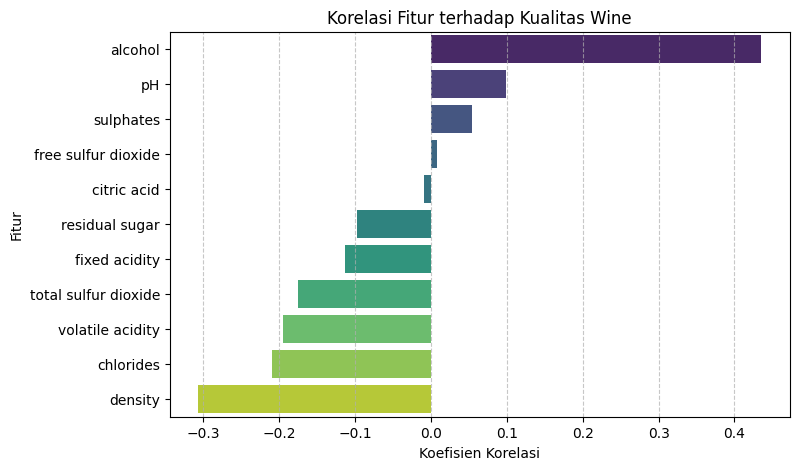

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(x=quality_corr.values, y=quality_corr.index, palette='viridis')
plt.title('Korelasi Fitur terhadap Kualitas Wine')
plt.xlabel('Koefisien Korelasi')
plt.ylabel('Fitur')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# Heatmap Korelasi

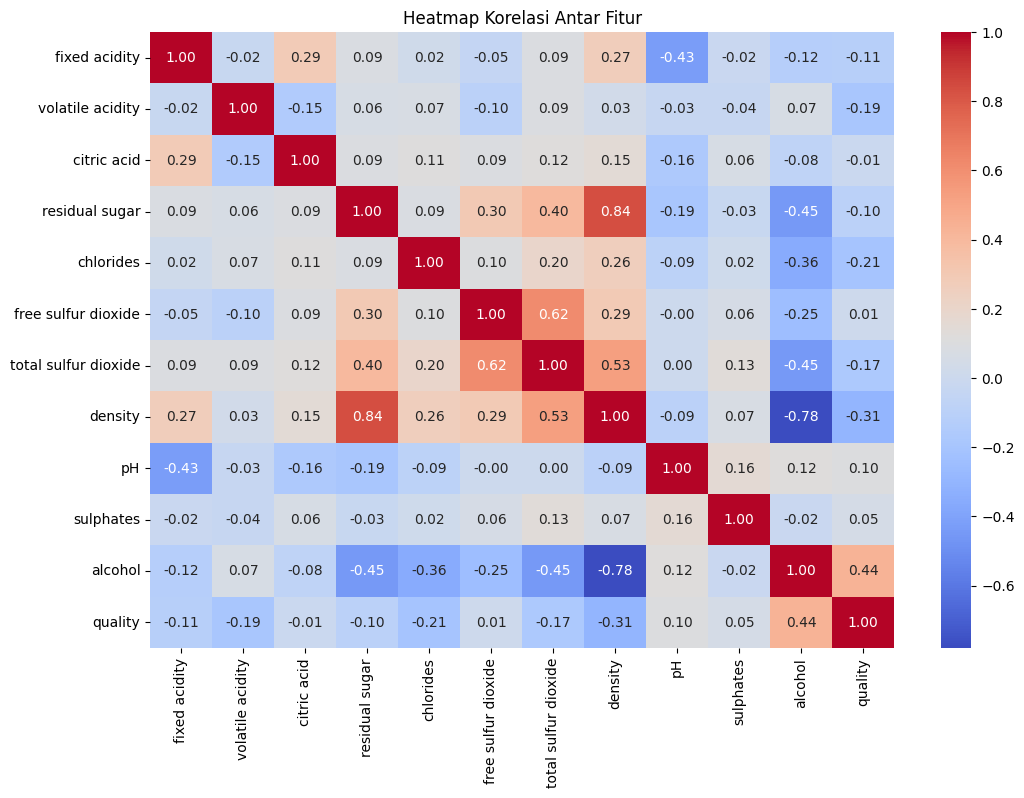

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# Visualisasi alkohol berdasarkan kualitas

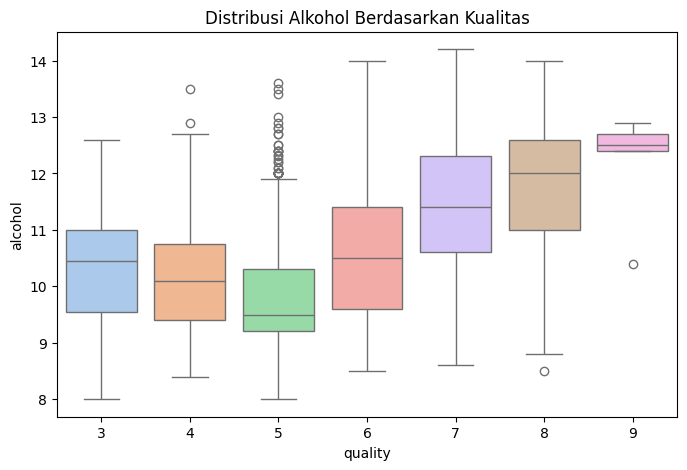

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=df, palette='pastel')
plt.title('Distribusi Alkohol Berdasarkan Kualitas')
plt.show()

# Pairplot fitur terpilih

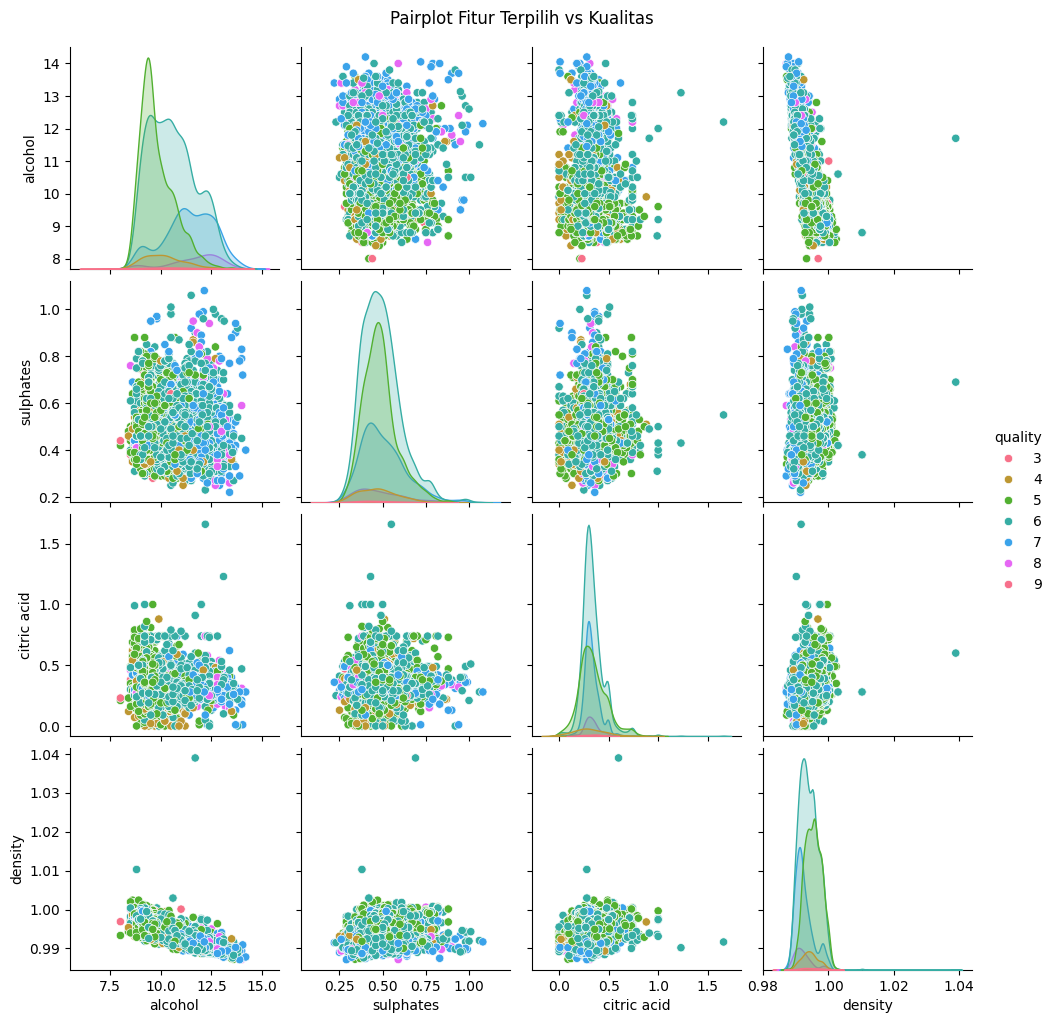

In [8]:
selected_features = ['alcohol', 'sulphates', 'citric acid', 'density', 'quality']
sns.pairplot(df[selected_features], hue='quality', palette='husl')
plt.suptitle('Pairplot Fitur Terpilih vs Kualitas', y=1.02)
plt.show()

# Distribusi kualitas

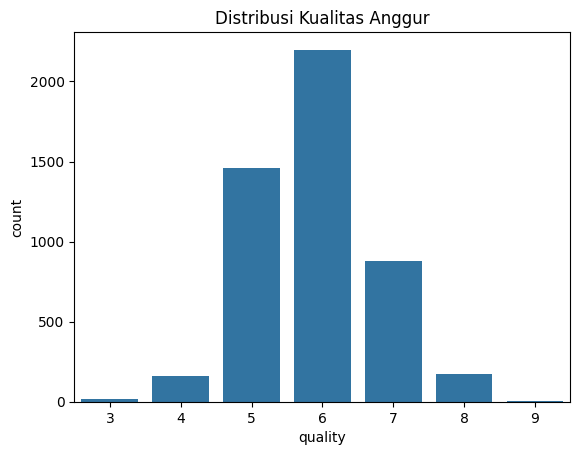

In [9]:
sns.countplot(x='quality', data=df)
plt.title('Distribusi Kualitas Anggur')
plt.show()

# Klasifikasi Biner: Baik (>=6) atau Buruk (<6)

In [10]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

X_bin = df.drop(['quality', 'quality_label'], axis=1)
y_bin = df['quality_label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

model_bin = RandomForestClassifier(n_estimators=100, random_state=42)
model_bin.fit(X_train_bin, y_train_bin)

y_pred_bin = model_bin.predict(X_test_bin)

print("=== Klasifikasi Biner ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_bin))

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin))

=== Klasifikasi Biner ===
Confusion Matrix:
[[233  88]
 [ 67 592]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       321
           1       0.87      0.90      0.88       659

    accuracy                           0.84       980
   macro avg       0.82      0.81      0.82       980
weighted avg       0.84      0.84      0.84       980



# Pentingnya fitur dalam klasifikasi biner

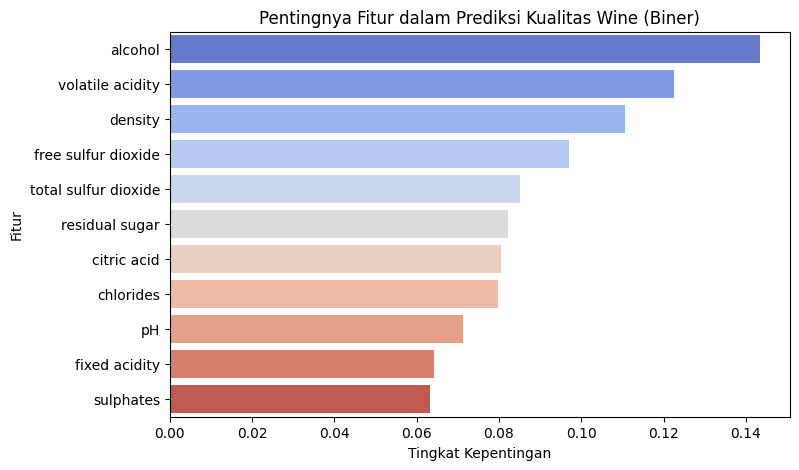

In [11]:
feature_importance_bin = pd.Series(model_bin.feature_importances_, index=X_bin.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_bin.values, y=feature_importance_bin.index, palette='coolwarm')
plt.title("Pentingnya Fitur dalam Prediksi Kualitas Wine (Biner)")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.show()